# Predicting the Spread in the English Premier League

## Initial Data set
From DataHub.io I found the last 10 seasons of EPL match results and stats.
Match stats including score, shots, shots on target, corner kicks and yellow/red card counts.


In [ ]:
# read in csv file data   choosing most recent full season for example
season_1718 = pd.read_csv('season-1718.csv')

#season_1718.head(3)
#season_1718.describe()

## Web scraped more data

But the initial data match stats were not descriptive enough to use as features, so I used Selenium to scrape passing and posession stats from Premierleague.com

Web scrape function code below as example or for code review.
The code worked but did not want to get through a whole season in one function call so I split the gathering into 3 equal parts, saved to csv files, then concatenated each csv to make a full season to add to DataFrame of match stats.



__Web Scrape Code__
Might be too much code to share but it was fun to get this to work with Selenium click through.
Call the function and watch it go if you please.

## Also scraped club wages and promotion/relegations data

Club wages only very accurate data available for the last 4 seasons. In the EPL the bottom 3 teams at the end of the year get removed from the league and replaced with the top 3 teams from the 2nd division league so there is turnover each year and I thought this would be a good categorical feature to include because if a team has been relegated or promoted they are likely a less talented team and thus their inclusion to a game could prove to influence the spread. 

Also, scraped from EA Sport the top 100 players in the world ranking and if a team in the EPL held those players I added a feature to denote that. Higher ranked players should theoretically produce influence on the match result spread.

## Feature Engineering
My stats alone and even the additional information was not proving very effective at predicting the match spread result.
I first used a basic OLS to check for coefficients to get a pulse of my data.

I realized the teams themselves were not being properly weighted in the model so I chose to give them a numerical rating coressponding to their place in the league at the time of the match.

But the rankings based on league position were also not being properly weighted so I gave each team Home/Away a ranking based on their Defensive and Attack/Offensive strength in realtion to the rest of the league.

I used dictionaries of the goals scored and goals conceded of each team after each match and tallied a goal per game scored and conceded measure and then divided that by each season's league running avg.
__This resulted in my most predictive features and really bumped up my predictive R squared measure and showed vast improvement in the error measures RMSE and MAE.__


Code code for reference in jupyter notebook __"Project 2 - EPL Spread Prediction - Code "__:
    It is rather long and clunky but it got the job done. Very open to suggestions for improvement. 

__Skip to next bolded markdown to bypass code__

### Top 3 graphs 
show Team rank based on position in the league with __LITTLE PREDICTIVE POWER__ but normally distributed

### Bottom 3 graphs 
show after feature engineering Defensive and Attack features per team with __MUCH MORE PREDICTIVE WEIGHT__

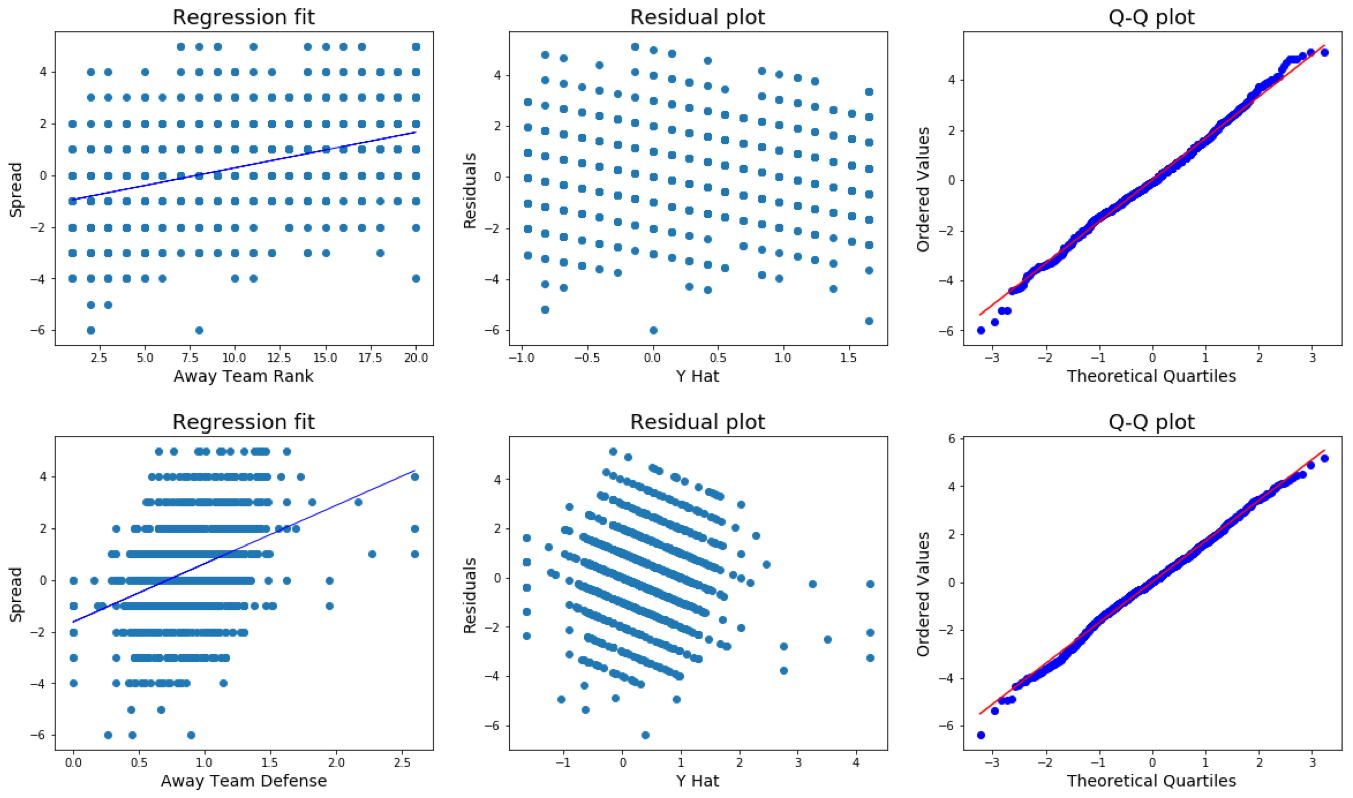





I had my Four engineered features which I knew to be my best baseline predictors from my Forward Feature selection plotting and one by one testing.
Meaning I placed each potential feature into an OLS regression model and recorded the Coefficients RMSE MAE and Intercept.

I chose RMSE because I found it the best indicator for feature value and reducing the error and variance of the model. 

__See appendix slide below__
Again the HomeTeam_rank and AwayTeam_rank variables and after engineering into the top four features. 

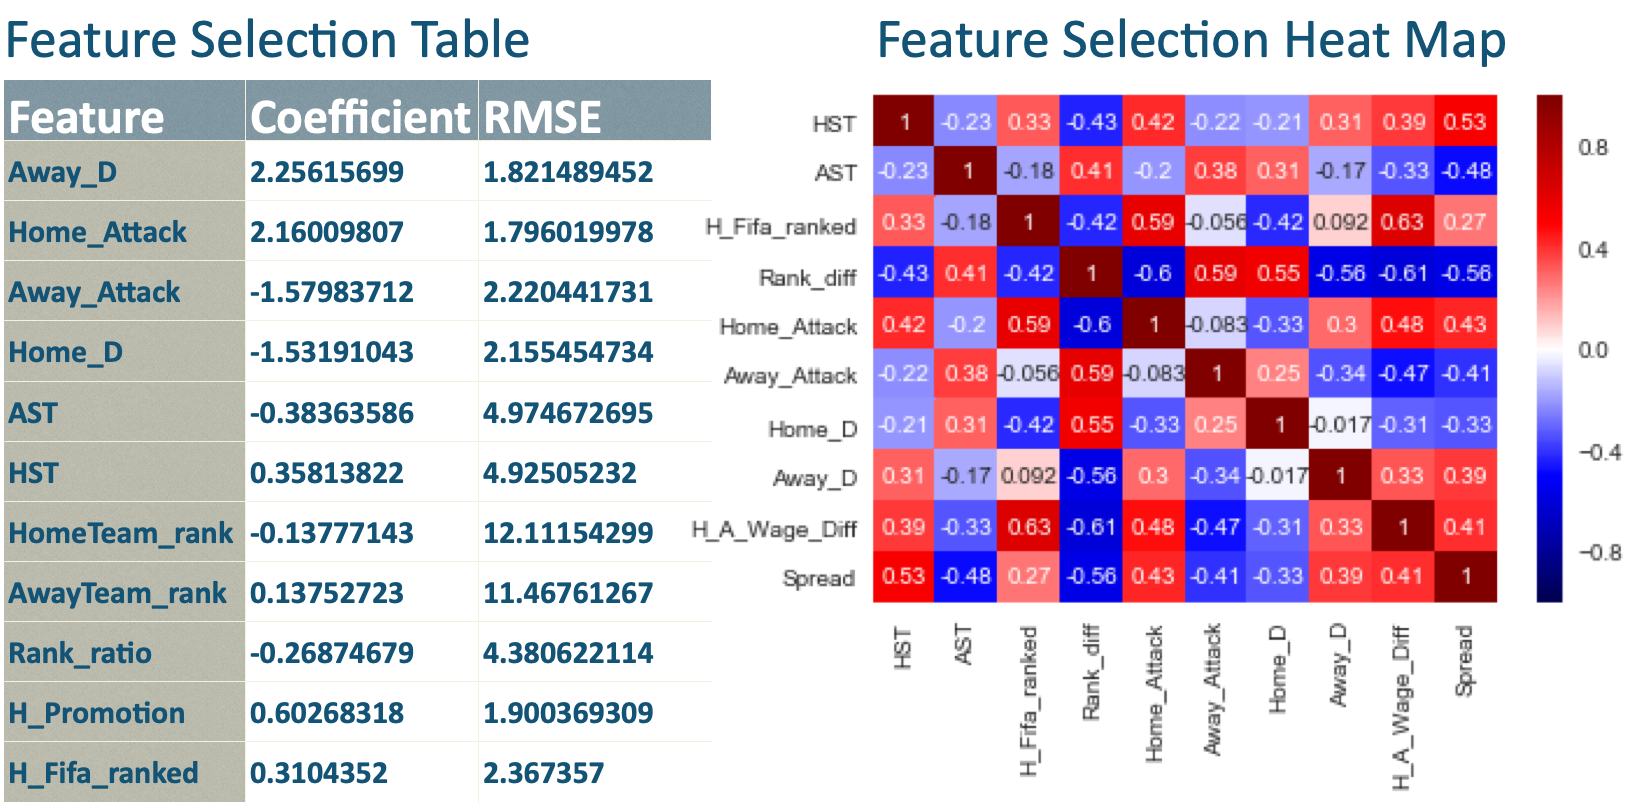

## Feature engineering done, time to model
I had a group of 16 features with varying importance from the RMSE MAE and Coefficients + my own intution, __Now time to model__

I placed my top 4 features into the __OLS model to get a baseline for my R^2 and RMSE__ going forward before other models.
R^2 was .48 up substantially from my first of .23 when I ran with my initial not web scraped and non feature engineered data. 

Then I __ran a Lasso with Cross Validation to find a basis point for my alpha__ to then use Lasso for some further feature selection tuning the alpha up from the suggested low to zero out features and determine my best fits.

This got my to about 8-12 best features down from 16 using only the training data.

__Train Test Split__ the data
I set up 3 models Ridge with Cross Validation, Lasso with Cross Validation and Elastic Net
Each model would see 3 feature sets, 8 features, 10 features and 12 features and record scores with Cross Validation alphas and apply each model to the training validation and test sets.
__Applied standard scalers__ to the data for each model

I did perform a __log10 transform__ to one feature I had constructed but ultimately it was collinear with another feature which proved a better fit for the model so the log10 transformed feature was left out. 



I __plotted each model's Predictions vs Residuals__ to check for random noise meaning the realtionship between features and Residuals(Yhat-Y) and thus Y values is reasonably linear. It suggests error variances are equal because the points are generally around the horizontal line at zero.
And it does show some outliers that occur but after data cleaning I determined those are true occurences. ie Man City beating Stoke 7-2 Oct 2017

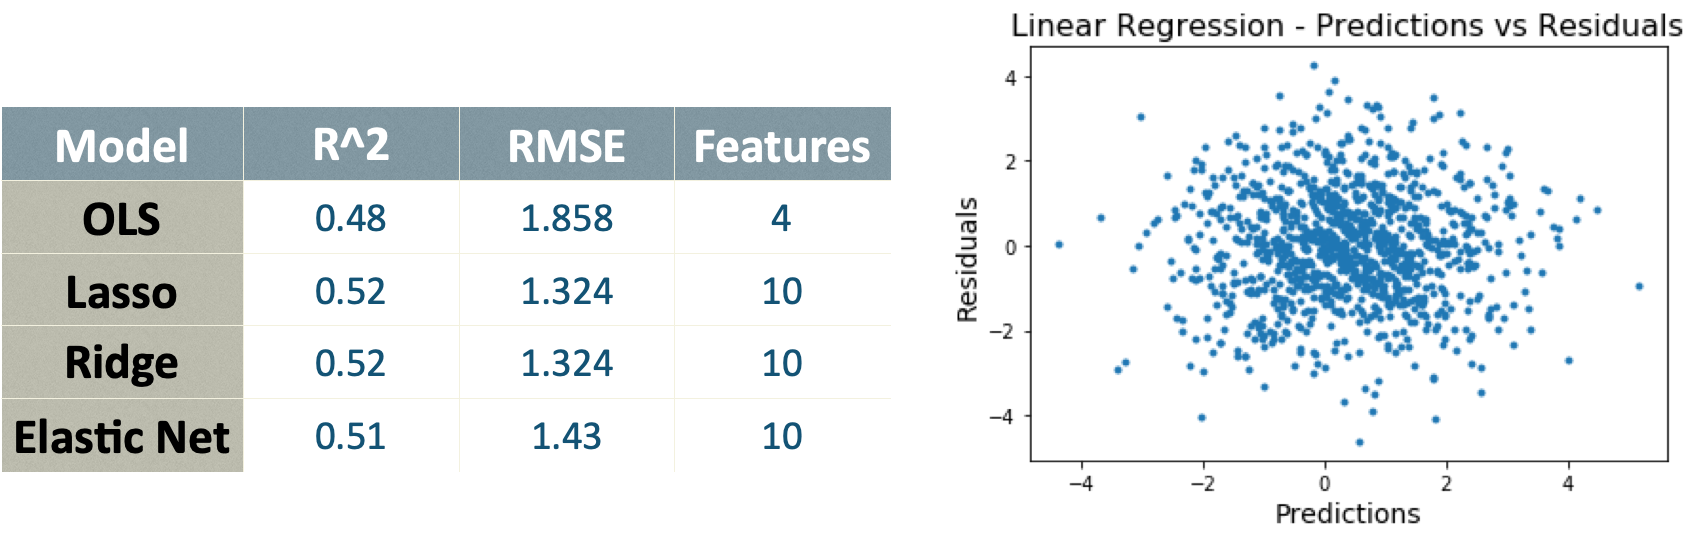

The Lasso and Ridge performed very similar over the cross validation trials and nearly identical in the final models. 

And when I compared the plot of each to see the features I saw __Ridge__ kept the (Home - Away wages) feature with a low coeffient value early that spikes higher as other variables get zeroed out. It feels suspect to use the Ridge with a coefficient value that starts very low and then has much more sway later on. 

__Lasso__ zeroed it out sooner and had the two features I engineered Away D and Home D as the most important variables to carry to end the for prediction. 

Overall I think at this stage I like the __Lasso Model is best__ because:
    1) Lasso has a slightly lower RMSE, here the better model has the least error.
    2) Lasso emphasizes the Defensive measures nearly eaqual and in sports the old adage "Defense Wins Championships" proves true time and time again.


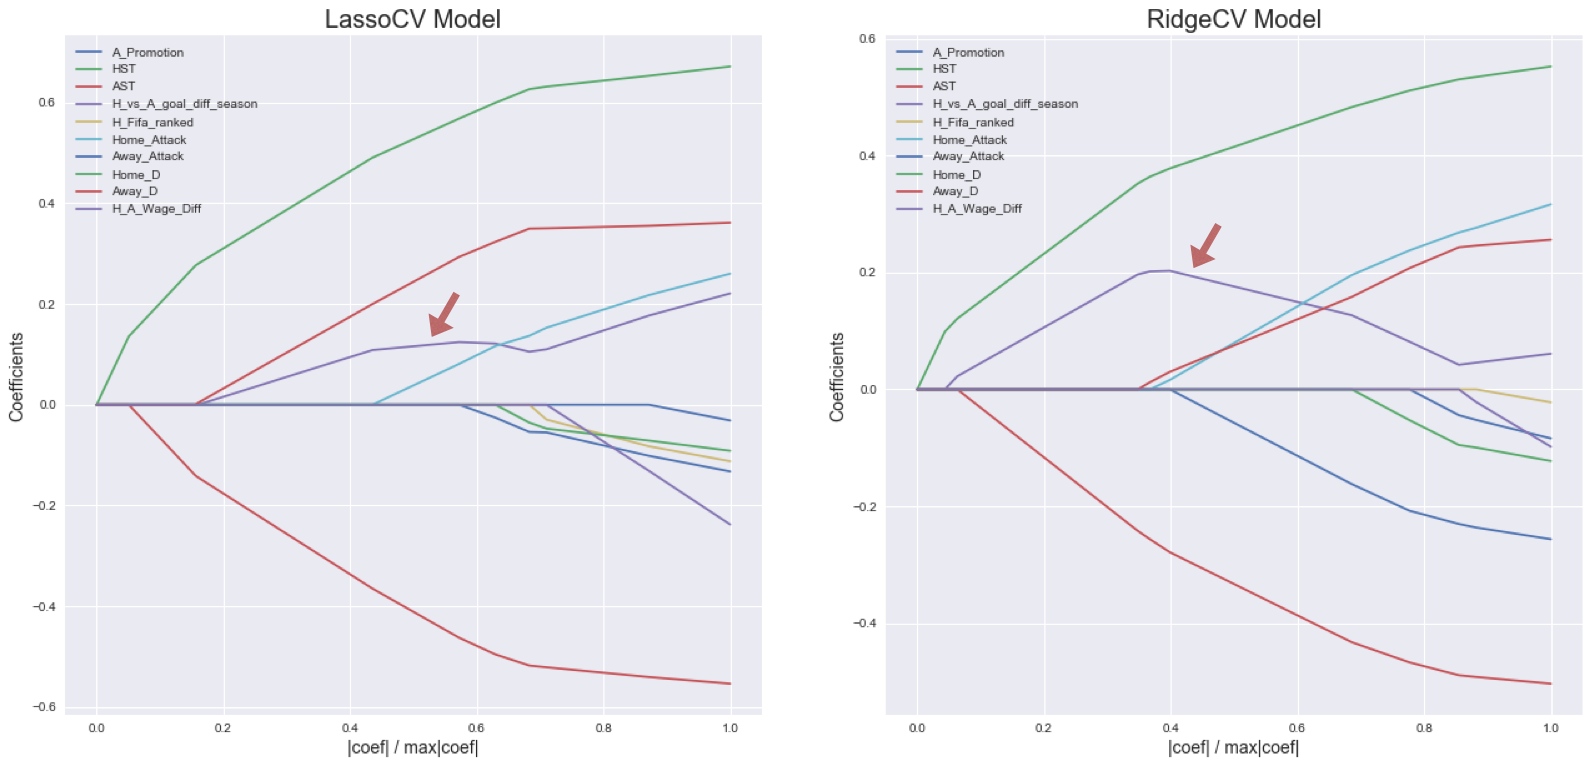

## Lasso and Ridge with 10 features + scaler transform   R^2 .523   RMSE 1.324

# Conclusion
### So, can this model predict the spread of a match in the EPL?  
### Not well with an average error of 1.3 goals off the mark but I think it did allow me to find some interesting insights like the importance of defense to positive results much more so than even precise attacking play and the wages paid to players by a club.
### Lastly I found the promotion sides (teams promoted to the top league) are much more successful at home than away and top fifa ranked players follow the same pattern, producing little effective difference away from home but show a decent effective weight when playing in front of their home crowd.

### Future Work
1) For future work I would like to add more seasons to train the model on more data and see how it performs.

2) Also I would like to engineer more features from the raw stats that could help increase the performance of the model.

3) Lastly I would like to explore more model types and a more Bayesian perspective, try to use weighted probabilities that could help with a different result.

# Thank you!
### Michael Weber